# Enrolments Data

## Exploration
### Statistical exploration

#### Reading the data, removing useless columns and adding special columns

In [1]:
import pandas as pd
import numpy as np
#Read the data
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-07-05T1254.csv",low_memory=False)

In [2]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType', 'LeadID', 'Status', 'OppCreatedDate',
       'OppOwnerMetro', 'SpeedtoLead', 'CampaignSource',
       'CampaignSourceCategory'],
      dtype='object')

In [3]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50407 entries, 0 to 50406
Data columns (total 28 columns):
Startdate                 50407 non-null int64
Enddate                   50407 non-null int64
Metro                     50407 non-null object
Course                    50407 non-null object
PhoneValid                50407 non-null object
Price                     50406 non-null float64
Type                      50407 non-null object
DaysEnroltoStart          46003 non-null float64
DaysInvoicetoEnrol        50407 non-null int64
DaysLeadtoEnroled         50407 non-null int64
EnrolDate                 50407 non-null int64
EnrolDay                  50407 non-null object
EnrolHour                 50407 non-null int64
Month                     50407 non-null int64
EnrolWeek                 50407 non-null int64
Year                      50407 non-null int64
CanceledDate              9327 non-null float64
CanceledMonth             9327 non-null float64
ExpectedPayment           38772 no

In [4]:
#Remove some useless columns
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledDate', 'CanceledMonth', 'ExpectedPayment', 'PardotCategory',
       'ApplicationType', 'LeadID', 'SpeedtoLead'],
      dtype='object')

In [5]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.notnull()

In [6]:
enrolments.drop('CanceledDate', axis=1, inplace=True)

In [7]:
enrolments.columns

Index(['Startdate', 'Enddate', 'Metro', 'Course', 'PhoneValid', 'Price',
       'Type', 'DaysEnroltoStart', 'DaysInvoicetoEnrol', 'DaysLeadtoEnroled',
       'EnrolDate', 'EnrolDay', 'EnrolHour', 'Month', 'EnrolWeek', 'Year',
       'CanceledMonth', 'ExpectedPayment', 'PardotCategory', 'ApplicationType',
       'LeadID', 'SpeedtoLead', 'Cancelled'],
      dtype='object')

In [8]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])

In [9]:
enrolments.APAC.value_counts()

False    42530
True      7877
Name: APAC, dtype: int64

In [ ]:
#Limit to only post mid-2014 data and pre mid-2017 data
enrolments = enrolments[enrolments.EnrolDate > 20140630]
enrolments = enrolments[enrolments.Startdate < 20170630]

In [90]:
#Cancellations are enroled before their course starts, so daysenroltostart must be positive
enrolments = enrolments[enrolments.DaysEnroltoStart > 0]

In [91]:
#Checkout all the numeric columns
#enrolments.info()
#enrolments.describe()
enrolments.shape

(35613, 23)

#### Dealing with null values

In [92]:
enrolments.isnull().sum()

Startdate             0
Enddate               0
Metro                 0
Course                0
PhoneValid            0
Price                 0
Type                  0
DaysEnroltoStart      0
DaysInvoicetoEnrol    0
DaysLeadtoEnroled     0
EnrolDate             0
EnrolDay              0
EnrolHour             0
Month                 0
EnrolWeek             0
Year                  0
ExpectedPayment       0
PardotCategory        0
ApplicationType       0
LeadID                0
SpeedtoLead           0
Cancelled             0
APAC                  0
dtype: int64

In [93]:
enrolments.CanceledMonth.fillna("None", inplace=True)
enrolments.Price.fillna(0, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'CanceledMonth'

In [94]:
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.PardotCategory.value_counts()

GA Course Leads         17264
Website                  5472
CWE Purchase             4282
Facebook Acquisition     1519
GA Dash                  1285
Other                    1284
Sweepstake               1189
Unknown                   688
GA Front Row Signup       501
Partner Event             442
Twitter Promoted          388
GA Circuits Leads         301
Twitter Acquisition       215
Uncategorized             201
Content Partnership       140
Livestream Purchase       130
Student Enrollment        129
Scholarship                93
Partner Livestream         90
Name: PardotCategory, dtype: int64

In [95]:
#enrolments.DaysEnroltoStart.mean()
enrolments.DaysEnroltoStart.fillna(enrolments.DaysEnroltoStart.mean(), inplace=True)

In [96]:
#enrolments.SpeedtoLead.value_counts()
enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [97]:
enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.ExpectedPayment.value_counts()

Student / Self                26524
Unknown                        5309
Employer                       3349
Veterans Affairs                176
Family                           91
Other                            83
Government Funding / Grant       49
GA Employee/Instructor           32
Name: ExpectedPayment, dtype: int64

In [98]:
enrolments.isnull().sum()

Startdate             0
Enddate               0
Metro                 0
Course                0
PhoneValid            0
Price                 0
Type                  0
DaysEnroltoStart      0
DaysInvoicetoEnrol    0
DaysLeadtoEnroled     0
EnrolDate             0
EnrolDay              0
EnrolHour             0
Month                 0
EnrolWeek             0
Year                  0
ExpectedPayment       0
PardotCategory        0
ApplicationType       0
LeadID                0
SpeedtoLead           0
Cancelled             0
APAC                  0
dtype: int64

#### Streamlining multiple categories

In [99]:
#Checkout only the more common application types
#enrolments.ApplicationType.value_counts()<100

In [100]:
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
commonapptypes

Index(['apply now', 'request info', 'info session', 'referral', 'invoice',
       'contact_admissions', 'get notified', 'financing contact us',
       'cwe_feedback', 'trial class', 'lander', 'open house'],
      dtype='object')

In [101]:
enrolments = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
enrolments.shape

(35477, 23)

In [102]:
enrolments.ApplicationType.value_counts()

apply now               12309
request info            11917
info session             7478
referral                  837
invoice                   526
contact_admissions        495
get notified              469
financing contact us      431
cwe_feedback              402
trial class               260
lander                    190
open house                163
Name: ApplicationType, dtype: int64

In [103]:
#Checkout only the more common Pardot types
#enrolments.PardotCategory.value_counts()>100
commonpdtypes = enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100]
commonpdtypes

Index(['GA Course Leads', 'Website', 'CWE Purchase', 'Facebook Acquisition',
       'Other', 'GA Dash', 'Sweepstake', 'Unknown', 'GA Front Row Signup',
       'Partner Event', 'Twitter Promoted', 'GA Circuits Leads',
       'Twitter Acquisition', 'Uncategorized', 'Content Partnership',
       'Livestream Purchase', 'Student Enrollment'],
      dtype='object')

In [104]:
enrolments = enrolments[enrolments.PardotCategory.isin(commonpdtypes)]
enrolments.shape

(35294, 23)

In [105]:
enrolments.PardotCategory.value_counts()

GA Course Leads         17199
Website                  5459
CWE Purchase             4260
Facebook Acquisition     1517
Other                    1279
GA Dash                  1271
Sweepstake               1188
Unknown                   681
GA Front Row Signup       500
Partner Event             441
Twitter Promoted          385
GA Circuits Leads         300
Twitter Acquisition       215
Uncategorized             201
Content Partnership       139
Livestream Purchase       130
Student Enrollment        129
Name: PardotCategory, dtype: int64

In [106]:
commoncourses = enrolments.Course.value_counts().index[enrolments.Course.value_counts()>100]
commoncourses
enrolments = enrolments[enrolments.Course.isin(commoncourses)]
enrolments.shape

(35294, 23)

In [107]:
enrolments.PhoneValid.unique()
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

In [108]:
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35294 entries, 758 to 46526
Data columns (total 23 columns):
Startdate             35294 non-null int64
Enddate               35294 non-null int64
Metro                 35294 non-null object
Course                35294 non-null object
PhoneValid            0 non-null float64
Price                 35294 non-null float64
Type                  35294 non-null object
DaysEnroltoStart      35294 non-null float64
DaysInvoicetoEnrol    35294 non-null int64
DaysLeadtoEnroled     35294 non-null int64
EnrolDate             35294 non-null int64
EnrolDay              35294 non-null object
EnrolHour             35294 non-null int64
Month                 35294 non-null int64
EnrolWeek             35294 non-null int64
Year                  35294 non-null int64
ExpectedPayment       35294 non-null object
PardotCategory        35294 non-null object
ApplicationType       35294 non-null object
LeadID                35294 non-null int64
SpeedtoLead         

In [109]:
enrolments.Cancelled.value_counts()
7177/(7717+32553)

0.17822200148994288

#### Pandas profile

In [110]:
#!pip install pandas-profiling

In [111]:
#import pandas_profiling
#apandas_profiling.ProfileReport(enrolments)

### Visualisation

In [133]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import plotly
import plotly.plotly as py
import plotly.graph_objs as go 
import folium
import plotly.figure_factory as ff

plotly.tools.set_credentials_file(username='Msquirchuk', api_key='kTj4gydNrsbGuMDjMcNn')

%matplotlib inline
sns.set(color_codes=True)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



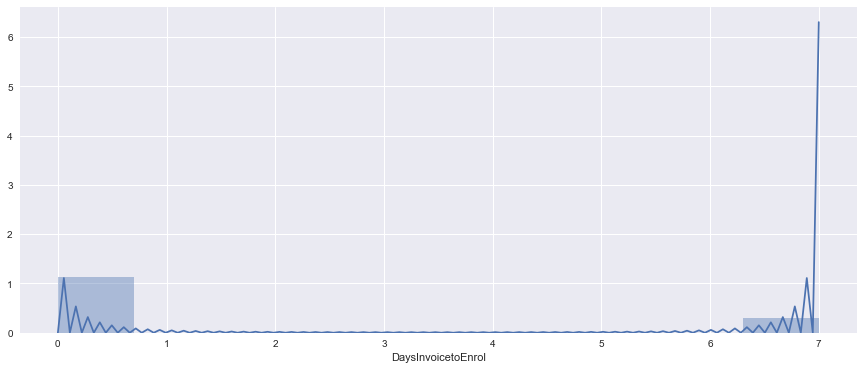

In [134]:
plt.figure(figsize = (15,6))
sns.distplot(enrolments.DaysInvoicetoEnrol, bins=10)

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



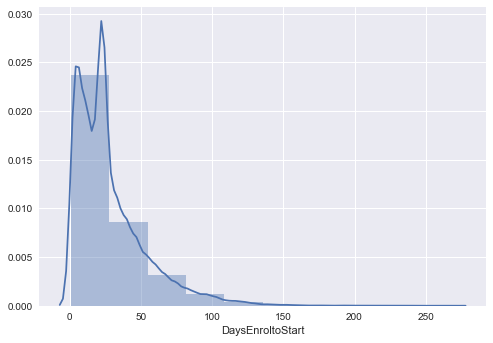

In [131]:
sns.distplot(enrolments.DaysEnroltoStart, bins=10)

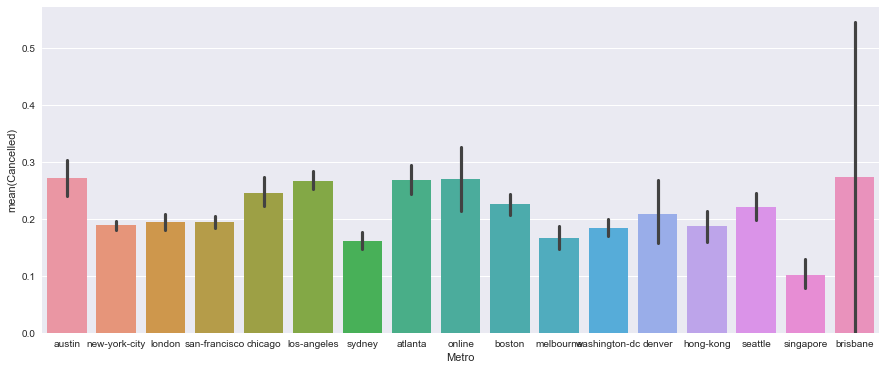

In [115]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

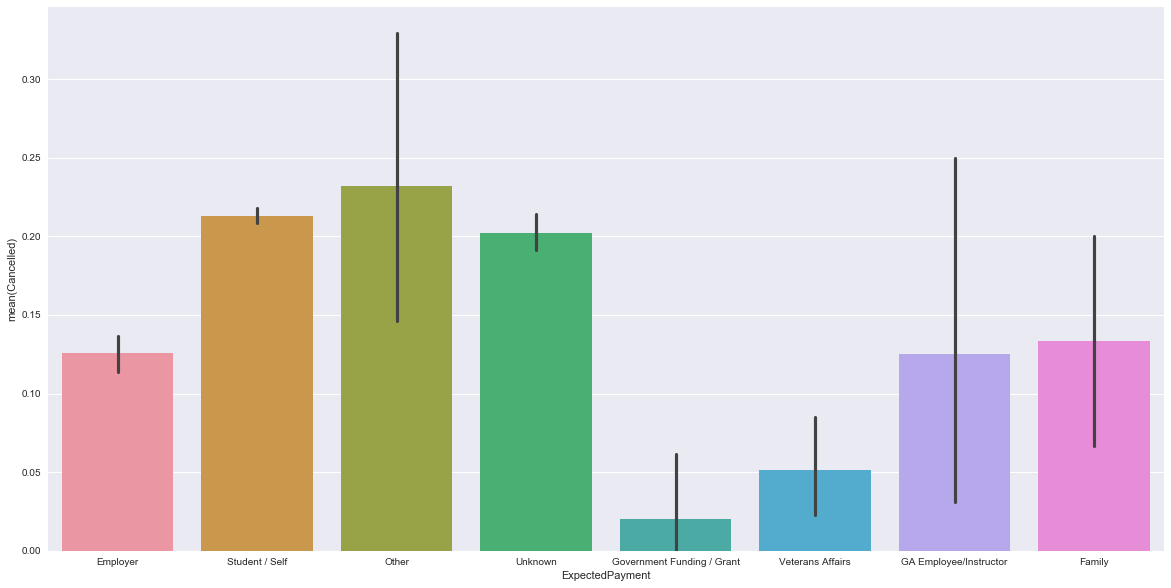

In [116]:
plt.figure(figsize = (20,10))
sns.barplot(x='ExpectedPayment', y = 'Cancelled', data = enrolments)

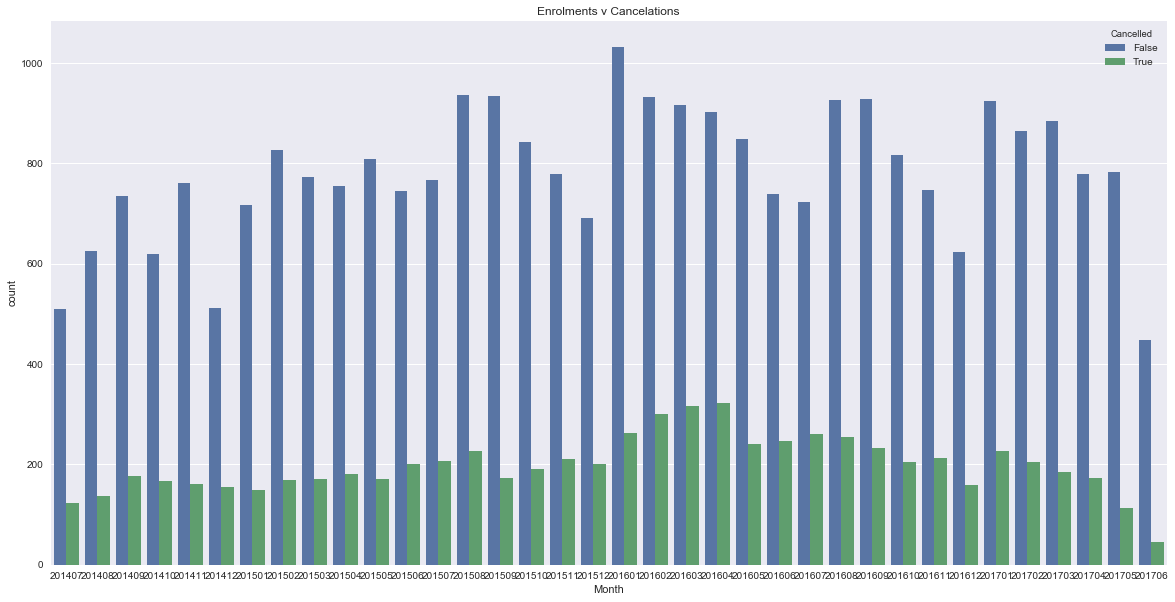

In [117]:
plt.figure(figsize=(20,10))
plt.title("Enrolments v Cancelations")
sns.countplot(x='Month', hue='Cancelled', data = enrolments)

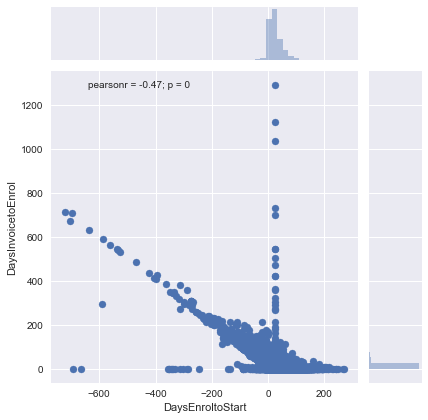

In [40]:
sns.jointplot(x='DaysEnroltoStart', y="DaysInvoicetoEnrol", data=enrolments)

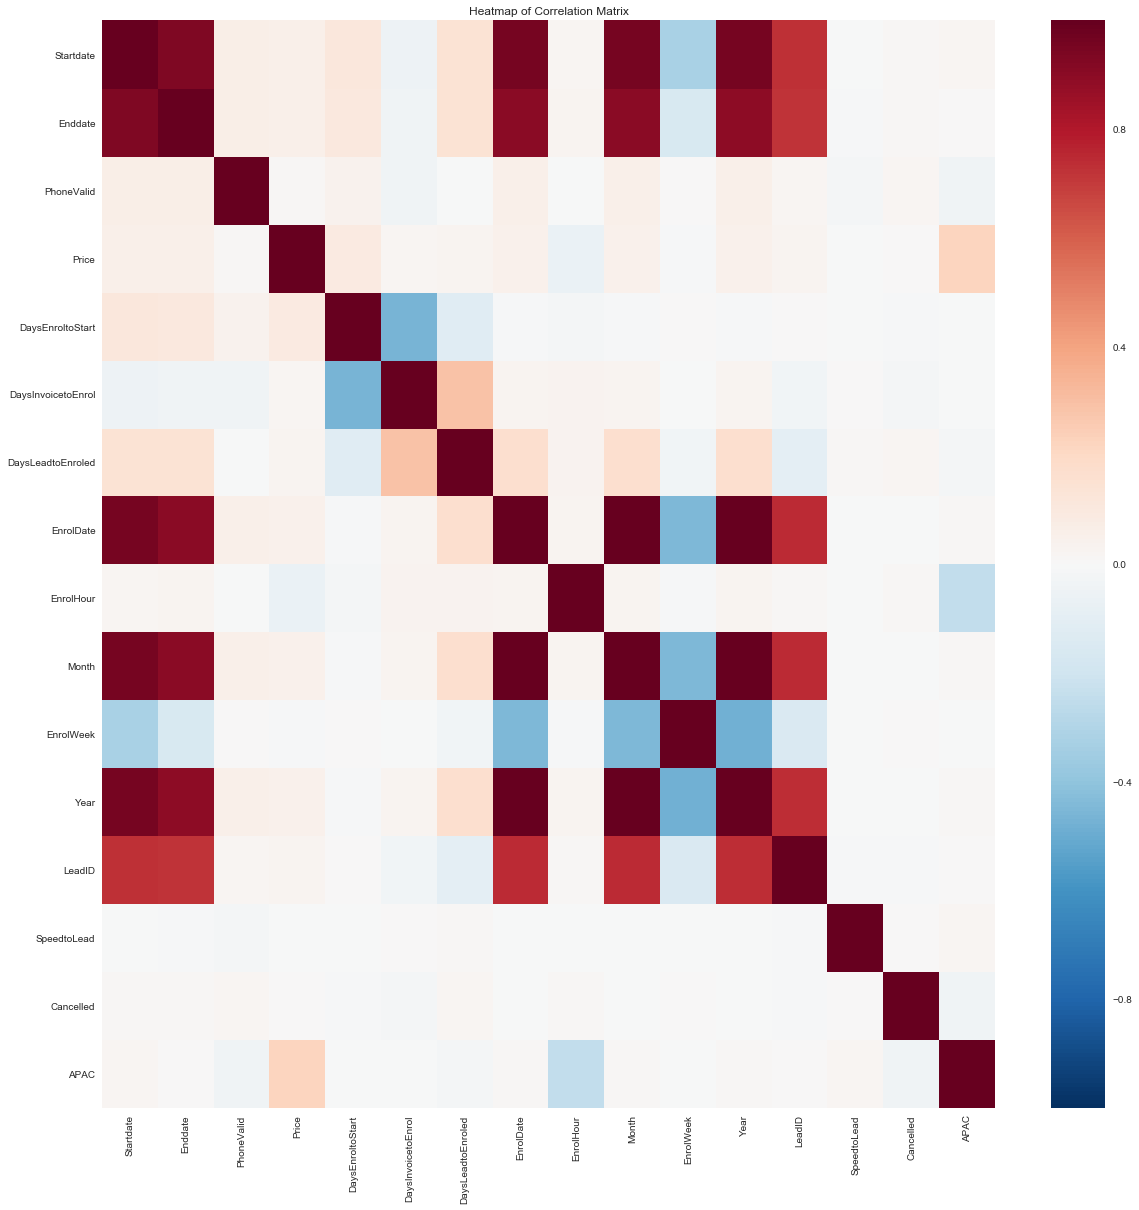

In [41]:
corr = enrolments.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

## Running dummy data
- These columns have text outputs:
 - Metro: object
 - Course: object
 - Type: object
 - EnrolDay: object
 - ExpectedPayment: object
 - ApplicationType: object
 - PardotCategory: object

In [44]:
enrolments.drop('CanceledMonth', axis=1, inplace=True)
enrolments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39524 entries, 758 to 50149
Data columns (total 23 columns):
Startdate             39524 non-null int64
Enddate               39524 non-null int64
Metro                 39524 non-null object
Course                39524 non-null object
PhoneValid            39524 non-null int64
Price                 39524 non-null float64
Type                  39524 non-null object
DaysEnroltoStart      39524 non-null float64
DaysInvoicetoEnrol    39524 non-null int64
DaysLeadtoEnroled     39524 non-null int64
EnrolDate             39524 non-null int64
EnrolDay              39524 non-null object
EnrolHour             39524 non-null int64
Month                 39524 non-null int64
EnrolWeek             39524 non-null int64
Year                  39524 non-null int64
ExpectedPayment       39524 non-null object
PardotCategory        39524 non-null object
ApplicationType       39524 non-null object
LeadID                39524 non-null int64
SpeedtoLead       

In [45]:
dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'] )

In [47]:
dummydata.shape

(39524, 103)

In [48]:
dummydata.columns

Index(['Startdate', 'Enddate', 'PhoneValid', 'Price', 'DaysEnroltoStart',
       'DaysInvoicetoEnrol', 'DaysLeadtoEnroled', 'EnrolDate', 'EnrolHour',
       'Month',
       ...
       'PardotCategory_Uncategorized', 'PardotCategory_Unknown',
       'PardotCategory_Website', 'EnrolDay_Friday', 'EnrolDay_Monday',
       'EnrolDay_Saturday', 'EnrolDay_Sunday', 'EnrolDay_Thursday',
       'EnrolDay_Tuesday', 'EnrolDay_Wednesday'],
      dtype='object', length=103)

## Let's try some algorithms!

### Decision Tree

In [49]:
dummydata.Cancelled.value_counts()

False    31899
True      7625
Name: Cancelled, dtype: int64

In [50]:
treesubset = dummydata

In [51]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

cancelled = treesubset['Cancelled']
del treesubset['Cancelled']
treesubset

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



,Startdate,Enddate,PhoneValid,Price,DaysEnroltoStart,DaysInvoicetoEnrol,DaysLeadtoEnroled,EnrolDate,EnrolHour,Month,...,PardotCategory_Uncategorized,PardotCategory_Unknown,PardotCategory_Website,EnrolDay_Friday,EnrolDay_Monday,EnrolDay_Saturday,EnrolDay_Sunday,EnrolDay_Thursday,EnrolDay_Tuesday,EnrolDay_Wednesday
758,20170628,20170918,1,3950.0,96.000000,0,93,20170324,15,201703,...,0,0,0,1,0,0,0,0,0,0
759,20170628,20170918,1,3950.0,8.000000,0,1,20170620,17,201706,...,0,0,0,0,0,0,0,0,1,0
760,20170628,20170918,1,3950.0,6.000000,0,134,20170622,23,201706,...,0,0,0,0,0,0,0,1,0,0
761,20170628,20170918,1,3950.0,40.000000,7,16,20170519,23,201705,...,0,0,0,1,0,0,0,0,0,0
762,20170628,20170918,1,3950.0,44.000000,7,48,20170515,18,201705,...,0,1,0,0,1,0,0,0,0,0
763,20170628,20170918,1,3950.0,22.957284,0,18,20170331,16,201703,...,0,0,0,1,0,0,0,0,0,0
764,20170628,20170918,1,3950.0,20.000000,7,31,20170608,0,201706,...,0,0,0,0,0,0,0,1,0,0
765,20170628,20170918,1,3950.0,18.000000,0,78,20170610,16,201706,...,0,0,0,0,0,1,0,0,0,0
766,20170628,20170918,1,3950.0,61.000000,0,2,20170428,17,201704,...,0,0,0,1,0,0,0,0,0,0
767,20170627,20170831,1,4500.0,0.000000,14,642,20170627,7,201706,...,0,0,0,0,0,0,0,0,1,0


In [52]:
X_train, X_test, y_train, y_test = train_test_split(treesubset, cancelled, random_state=1)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()
features

['Startdate',
 'Enddate',
 'PhoneValid',
 'Price',
 'DaysEnroltoStart',
 'DaysInvoicetoEnrol',
 'DaysLeadtoEnroled',
 'EnrolDate',
 'EnrolHour',
 'Month',
 'EnrolWeek',
 'Year',
 'LeadID',
 'SpeedtoLead',
 'APAC',
 'Metro_atlanta',
 'Metro_austin',
 'Metro_boston',
 'Metro_brisbane',
 'Metro_chicago',
 'Metro_denver',
 'Metro_hong-kong',
 'Metro_london',
 'Metro_los-angeles',
 'Metro_melbourne',
 'Metro_new-york-city',
 'Metro_online',
 'Metro_san-francisco',
 'Metro_seattle',
 'Metro_singapore',
 'Metro_sydney',
 'Metro_washington-dc',
 'Course_android-development-immersive',
 'Course_back-end-web-development',
 'Course_business-fundamentals-tactics',
 'Course_data-analytics',
 'Course_data-science',
 'Course_data-science-immersive',
 'Course_digital-marketing',
 'Course_front-end-web-development',
 'Course_ios-development',
 'Course_javascript-development',
 'Course_product-management',
 'Course_product-management-immersive',
 'Course_user-experience-design',
 'Course_user-experience

In [53]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

#### Previously exported: 
<img src="assets/img/decisiontree-enrolments.png">

### Logistic Regression

In [ ]:
import pandas as pd
# data = dummydata
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')

In [ ]:
X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [ ]:
#split the data
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#fit the logreg model and print the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])
print(logreg.fit(X_train, y_train))

In [ ]:
#test accuracy
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred_class))

In [ ]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

In [ ]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)

In [ ]:
print(scores.mean())

In [ ]:
#print the confusion matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_class))

In [ ]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

### Regression 

In [ ]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

In [ ]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
# Print the optimal value of Alpha for Ridge Regression
print('Optimal Alpha Value: ', rregcv.alpha_)
# Print the RMSE for the ridge regression model
preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)
enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)
# Print the new accuracy rate
print(metrics.accuracy_score(y_test, y_pred_class))

### Random Forrest

In [ ]:
#all_ftcolumns

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1)
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)
rfclf.oob_score_

In [ ]:
pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})

## Parameter tuning?